In [225]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    
    return 1/(1+(25*(x**2)))

def Cubic_Splines(xn,x,ya_prime, yb_prime):
    
    #create yn
    yn = func(xn)
    
    A = np.zeros(shape=(len(xn), len(xn)))
    b = np.zeros(shape=len(xn))
    
    #given two conditions
    A[0][0] = 1
    b[0] = ya_prime
    A[-1][-1] = 1
    b[-1] = yb_prime
    
    for j in range(1,len(A)-1):
    
        A[j][j-1] = 1
        A[j][j] = 4
        A[j][j+1] = 1
        
        h = xn[j+1] - xn[j] 
        
        b[j] = (3/h) * (yn[j+1] - yn[j-1])
        
    v = np.linalg.inv(A.copy()).dot(b.copy())
    
    #now can move on to calculating coefficients
    #create list for a,b,c,d coefficients
    #we need to have a polynomial for each sub interval
    no_sub_intervals = len(xn) - 1 
    aj = np.zeros(no_sub_intervals)
    bj = np.zeros(no_sub_intervals)
    cj = np.zeros(no_sub_intervals)
    dj = np.zeros(no_sub_intervals)
    
    for j in range(len(xn)-1):
        
        aj[j] = yn[j]
        bj[j] = v[j]
        cj[j] = (3*(yn[j+1]-yn[j])/((xn[j+1]-xn[j])**2)) - ((v[j+1]+(2*v[j]))/(xn[j+1]-xn[j]))
        dj[j] = (-2*(yn[j+1]-yn[j]))/((xn[j+1]-xn[j])**3) + (v[j+1]+v[j])/((xn[j+1]-xn[j])**2)
        
    #for now this function only interpolates with a single point
    y = 'Out Of Bounds'
    
    for i in range(len(xn)-1):
        
        #needs to check if point lies within any of the sub intervals
        if xn[i] < x <= xn[i+1]:
            
            y = aj[i] + (bj[i] * (x-xn[i])) + (cj[i] * (x-xn[i])**2)+ (dj[i] * (x-xn[i])**3)
    
    #print out the polynomials for each interval
    for i in range(len(xn) - 1):
        
        sign = -xn[i]
        
        if sign > 0:
            sign = '+' + str(sign)
        if sign == 0:
            sign = ''
        
        aj = np.around(aj,3)
        bj = np.around(bj,3)
        cj = np.around(cj,3)
        dj = np.around(dj,3)
        
        #clean up terms
        #this is defo not the most efficient way of doing this lol
        
        term2 = '(x{})'.format(sign)
        if bj[i] > 0:
            term2 = '+' + str(bj[i]) + term2
        elif bj[i] == 0:
            term2 = ''
        elif bj[i] == 1:
            term2 = '+' + term2
        else:
            term2 = str(bj[i]) + term2
            
        term3 = '(x{})'.format(sign)
        if cj[i] > 0:
            term3 = '+' + str(cj[i]) + term3
        elif cj[i] == 0:
            term3 = ''
        elif cj[i] == 1:
            term3 = '+' + term3
        else:
            term3 = str(cj[i]) + term3
            
        term4 = '(x{})'.format(sign)
        if dj[i] > 0:
            term4 = '+' + str(dj[i]) + term4
        elif dj[i] == 0:
            term4 = ''
        elif dj[i] == 1:
            term4 = '+' + term4
        else:
            term4 = str(dj[i]) + term4
            
        string = 'For the interval [{0},{1}], we have the following interval:\
        {2}{3} {4}\u00b2 {5}\u00b3 \n'.format(xn[i], xn[i+1], aj[i], term2, term3, term4)
        print(string.center(30))
        
        #plot the polynomial for the cubic spline
        p_x = np.linspace(xn[i], xn[i+1], 50)
        p_y = []
        for k in range(len(p_x)):
            p_y += [aj[i] + (bj[i] * (p_x[k]-xn[i])) + (cj[i] * (p_x[k]-xn[i])**2)+ (dj[i] * (p_x[k]-xn[i])**3)]
            
        plt.plot(p_x,p_y, c='b')
    
    #plot linear spline
    plt.plot(xn,yn, '--', 'k', label='Linear Spline')
    
    #plot smooth f(x)
    x_fx = np.linspace(xn[0], xn[-1], 50)
    y_fx = func(x_fx)
    plt.plot(x_fx,y_fx,label='f(x)')
    
    plt.legend()
    
    
    return 'x :' + str(x) +', y :' + str(y)

For the interval [-1.0,-0.5], we have the following interval:        0.038+0.074(x+1.0) -1.95(x+1.0)² +4.4(x+1.0)³ 

For the interval [-0.5,0.0], we have the following interval:        0.138+1.424(x+0.5) +4.65(x+0.5)² -8.098(x+0.5)³ 

For the interval [0.0,0.5], we have the following interval:        1.0 -7.497(x)² +8.098(x)³ 

For the interval [0.5,1.0], we have the following interval:        0.138-1.424(x-0.5) +4.65(x-0.5)² -4.4(x-0.5)³ 



'x :0.5, y :0.13793103448275845'

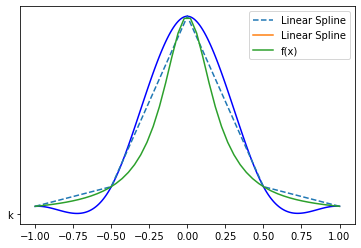

In [226]:
import numpy as np

xn = np.linspace(-1,1,5)
yn = func(xn)
ya_prime = 0.074
yb_prime = -0.074
x = 0.5

Cubic_Splines(xn,x,ya_prime, yb_prime)
